# NYC Delivery Truck Congestion – Step 3: Feature Engineering
*Author: Karan Chauhan*  

This notebook extracts temporal features from the filtered 311 complaint dataset to prepare it for machine learning modeling.

**Features created:**
- Hour of day (0-23)
- Day of week (0=Monday, 6=Sunday)
- Weekend flag (binary)
- Rush hour flag (binary)
- Month (1-12)

---

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Filtered Dataset

In [7]:
df = pd.read_csv('../data/311_truck_broad_filtered.csv')

print(f"Loaded {len(df):,} truck-related complaints")
print(f"Date range: {df['created_date'].min()} to {df['created_date'].max()}")

df.head()

Loaded 110,787 truck-related complaints
Date range: 2023-01-01 00:31:23 to 2025-11-07 12:16:51


,created_date,complaint_type,descriptor,borough,latitude,longitude,street_name
0,2023-01-01 00:31:23,Illegal Parking,Double Parked Blocking Traffic,MANHATTAN,40.837321,-73.942507,BROADWAY
1,2023-01-01 00:43:13,Illegal Parking,Double Parked Blocking Vehicle,MANHATTAN,40.837597,-73.945560,WEST 161 STREET
2,2023-01-01 00:59:17,Illegal Parking,Double Parked Blocking Traffic,MANHATTAN,40.755292,-73.994922,9 AVENUE
3,2023-01-01 01:13:56,Illegal Parking,Double Parked Blocking Traffic,MANHATTAN,40.836665,-73.943331,WEST 161 STREET
4,2023-01-01 01:24:59,Illegal Parking,Blocked Hydrant,MANHATTAN,40.854916,-73.936035,WEST 187 STREET


## Convert to Datetime Format

In [8]:
df['created_date'] = pd.to_datetime(df['created_date'])

print(f"Converted to datetime: {df['created_date'].dtype}")
print(f"Example: {df['created_date'].iloc[0]}")

Converted to datetime: datetime64[ns]
Example: 2023-01-01 00:31:23


## Extract Temporal Features

### Hour of Day

In [9]:
df['hour'] = df['created_date'].dt.hour

print("Hour distribution:")
print(df['hour'].value_counts().sort_index())

Hour distribution:
hour
0     2233
1     1371
2      794
3      571
4      563
5      771
6     1644
7     3806
8     6184
9     7064
10    6513
11    6789
12    6935
13    6950
14    6361
15    6430
16    6095
17    6761
18    6590
19    6283
20    5633
21    6707
22    4514
23    3225
Name: count, dtype: int64


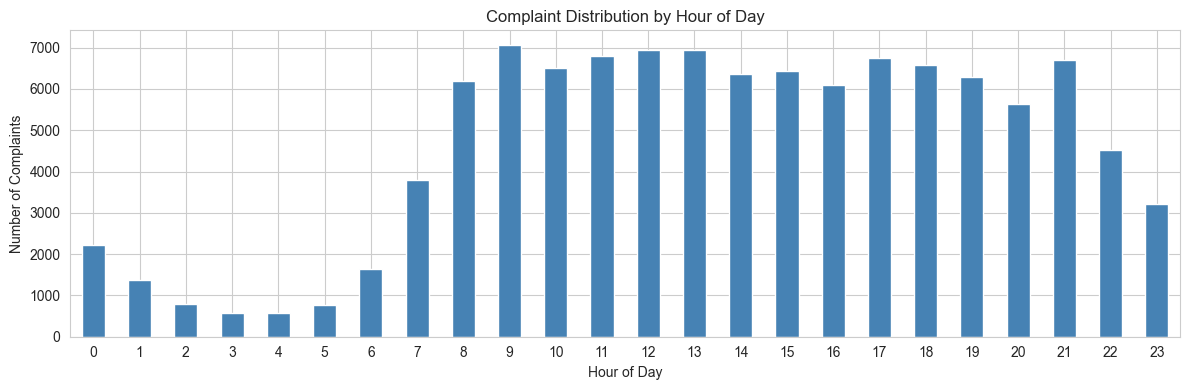

In [10]:
plt.figure(figsize=(12, 4))
df['hour'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Complaint Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Day of Week

In [11]:
df['day_of_week'] = df['created_date'].dt.dayofweek

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_names)

print("Day of week distribution:")
print(df['day_name'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 
                                               'Thursday', 'Friday', 'Saturday', 'Sunday']))

Day of week distribution:
day_name
Monday       15139
Tuesday      16753
Wednesday    16653
Thursday     16477
Friday       16661
Saturday     14348
Sunday       14756
Name: count, dtype: int64


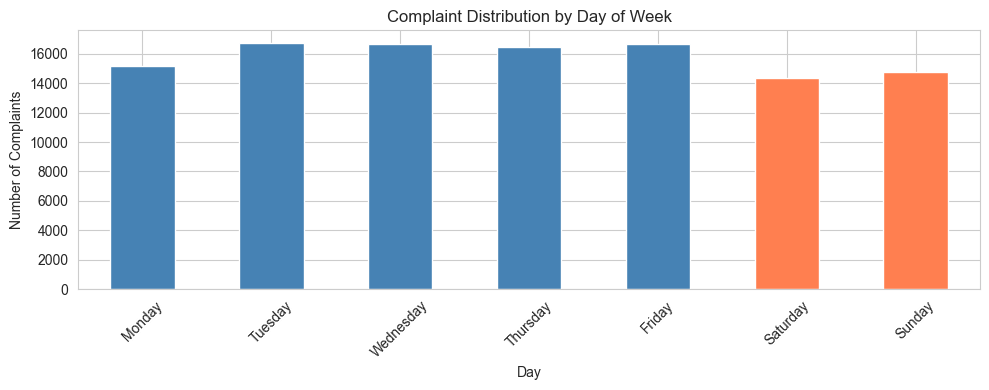

In [12]:
plt.figure(figsize=(10, 4))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
counts = df['day_name'].value_counts().reindex(day_order)
counts.plot(kind='bar', color=['steelblue']*5 + ['coral']*2)
plt.title('Complaint Distribution by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Weekend Flag

In [13]:
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

print("Weekend vs Weekday counts:")
print(df['is_weekend'].value_counts())
print(f"\nWeekend percentage: {df['is_weekend'].mean()*100:.1f}%")

Weekend vs Weekday counts:
is_weekend
0    81683
1    29104
Name: count, dtype: int64

Weekend percentage: 26.3%


### Rush Hour Flag

In [14]:
rush_hours = [7, 8, 9, 16, 17, 18]
df['is_rush_hour'] = df['hour'].isin(rush_hours).astype(int)

print("Rush hour vs Non-rush hour counts:")
print(df['is_rush_hour'].value_counts())
print(f"\nRush hour percentage: {df['is_rush_hour'].mean()*100:.1f}%")

Rush hour vs Non-rush hour counts:
is_rush_hour
0    74287
1    36500
Name: count, dtype: int64

Rush hour percentage: 32.9%


### Month

In [15]:
df['month'] = df['created_date'].dt.month

print("Month distribution:")
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
month_counts = df['month'].value_counts().sort_index()
print(month_counts)

Month distribution:
month
1      8501
2      8223
3      9809
4     10096
5     11546
6     10659
7      8327
8      9044
9     10640
10    10701
11     7045
12     6196
Name: count, dtype: int64


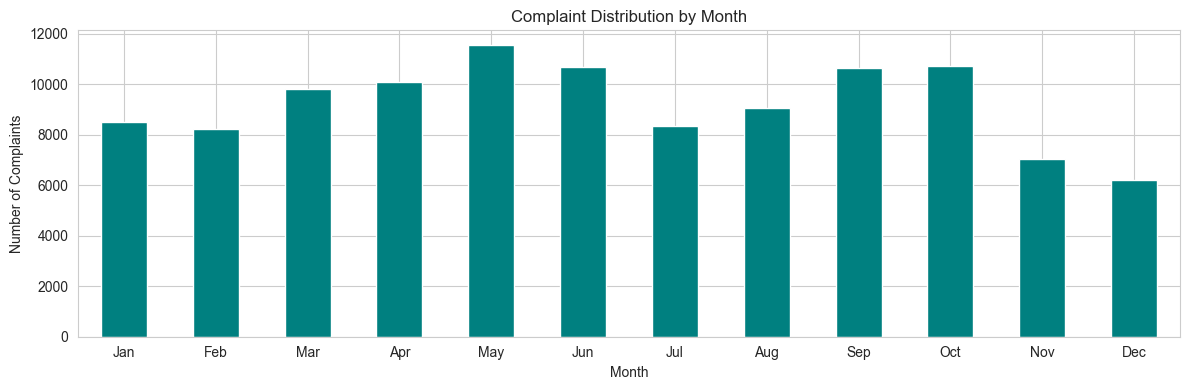

In [16]:
plt.figure(figsize=(12, 4))
month_counts.plot(kind='bar', color='teal')
plt.title('Complaint Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.xticks(range(len(month_counts)), [month_names[m] for m in month_counts.index], rotation=0)
plt.tight_layout()
plt.show()

## Feature Validation

In [17]:
feature_cols = ['hour', 'day_of_week', 'is_weekend', 'is_rush_hour', 'month']

print("Missing values:")
print(df[feature_cols].isnull().sum())

print("\nValue ranges:")
print(f"Hour: {df['hour'].min()} to {df['hour'].max()}")
print(f"Day of week: {df['day_of_week'].min()} to {df['day_of_week'].max()}")
print(f"Is weekend: {sorted(df['is_weekend'].unique())}")
print(f"Is rush hour: {sorted(df['is_rush_hour'].unique())}")
print(f"Month: {df['month'].min()} to {df['month'].max()}")

Missing values:
hour            0
day_of_week     0
is_weekend      0
is_rush_hour    0
month           0
dtype: int64

Value ranges:
Hour: 0 to 23
Day of week: 0 to 6
Is weekend: [np.int64(0), np.int64(1)]
Is rush hour: [np.int64(0), np.int64(1)]
Month: 1 to 12


## Feature Summary Statistics

In [18]:
print("Descriptive statistics:")
print(df[feature_cols].describe())

print("\nFeature correlations:")
correlation = df[feature_cols].corr()
print(correlation)

Descriptive statistics:
                hour    day_of_week     is_weekend   is_rush_hour  \
count  110787.000000  110787.000000  110787.000000  110787.000000   
mean       13.870400       2.946284       0.262702       0.329461   
std         5.454736       1.961974       0.440104       0.470020   
min         0.000000       0.000000       0.000000       0.000000   
25%        10.000000       1.000000       0.000000       0.000000   
50%        14.000000       3.000000       0.000000       0.000000   
75%        18.000000       5.000000       1.000000       1.000000   
max        23.000000       6.000000       1.000000       1.000000   

               month  
count  110787.000000  
mean        6.333776  
std         3.267236  
min         1.000000  
25%         4.000000  
50%         6.000000  
75%         9.000000  
max        12.000000  

Feature correlations:
                  hour  day_of_week  is_weekend  is_rush_hour     month
hour          1.000000     0.035600    0.036501     

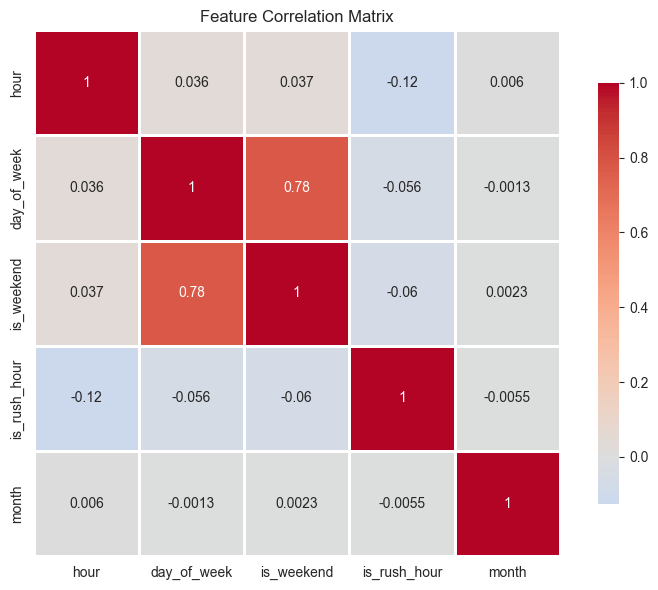

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

## Save Enhanced Dataset

In [20]:
output_df = df[[
    'created_date', 'complaint_type', 'descriptor', 'borough',
    'latitude', 'longitude', 'street_name',
    'hour', 'day_of_week', 'day_name', 'is_weekend', 'is_rush_hour', 'month'
]].copy()

output_path = '../data/complaints_with_features.csv'
output_df.to_csv(output_path, index=False)

print(f"Saved {len(output_df):,} rows with {len(output_df.columns)} columns")
print(f"Output file: {output_path}")
print(f"\nNew features: hour, day_of_week, day_name, is_weekend, is_rush_hour, month")

output_df.head(10)

Saved 110,787 rows with 13 columns
Output file: ../data/complaints_with_features.csv

New features: hour, day_of_week, day_name, is_weekend, is_rush_hour, month


,created_date,complaint_type,descriptor,borough,latitude,longitude,street_name,hour,day_of_week,day_name,is_weekend,is_rush_hour,month
0,2023-01-01 00:31:23,Illegal Parking,Double Parked Blocking Traffic,MANHATTAN,40.837321,-73.942507,BROADWAY,0,6,Sunday,1,0,1
1,2023-01-01 00:43:13,Illegal Parking,Double Parked Blocking Vehicle,MANHATTAN,40.837597,-73.945560,WEST 161 STREET,0,6,Sunday,1,0,1
2,2023-01-01 00:59:17,Illegal Parking,Double Parked Blocking Traffic,MANHATTAN,40.755292,-73.994922,9 AVENUE,0,6,Sunday,1,0,1
3,2023-01-01 01:13:56,Illegal Parking,Double Parked Blocking Traffic,MANHATTAN,40.836665,-73.943331,WEST 161 STREET,1,6,Sunday,1,0,1
4,2023-01-01 01:24:59,Illegal Parking,Blocked Hydrant,MANHATTAN,40.854916,-73.936035,WEST 187 STREET,1,6,Sunday,1,0,1
5,2023-01-01 01:26:18,Illegal Parking,Blocked Hydrant,MANHATTAN,40.854252,-73.936292,OVERLOOK TERRACE,1,6,Sunday,1,0,1
6,2023-01-01 01:33:57,Illegal Parking,Blocked Crosswalk,MANHATTAN,40.791098,-73.939567,EAST 108 STREET,1,6,Sunday,1,0,1
7,2023-01-01 01:42:25,Illegal Parking,Blocked Hydrant,MANHATTAN,40.804666,-73.953830,WEST 117 STREET,1,6,Sunday,1,0,1
8,2023-01-01 02:08:28,Illegal Parking,Double Parked Blocking Vehicle,MANHATTAN,40.763375,-73.994488,WEST 47 STREET,2,6,Sunday,1,0,1
9,2023-01-01 04:58:52,Illegal Parking,Blocked Bike Lane,MANHATTAN,40.722401,-73.986904,EAST HOUSTON STREET,4,6,Sunday,1,0,1
